In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

if os.path.exists("MSFT.csv"):
    data = pd.read_csv("MSFT.csv", index_col=0)
else: #download data if not found
    data = yf.Ticker("MSFT")
    data = data.history(period="max")
    data.to_csv("MSFT.csv")



# Convert the index to datetime with utc=True
data.index = pd.to_datetime(data.index, utc=True)

# Ensure the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data = data.set_index(pd.to_datetime(data.index, utc=True))

# Filter data to include only records from 2016 onwards
data = data[data.index.year >= 2010]

# reset the index (the index will be 0,1,2... rather than the date)
# data = data.reset_index()

#volume values are too lage
data['Volume'] = data['Volume']/10000000

data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 05:00:00+00:00,23.224624,23.588694,23.201869,23.474922,3.84091,0.0,0.0
2010-01-05 05:00:00+00:00,23.399067,23.588686,23.239785,23.482498,4.97496,0.0,0.0
2010-01-06 05:00:00+00:00,23.421820,23.573516,23.148769,23.338388,5.81824,0.0,0.0
2010-01-07 05:00:00+00:00,23.232203,23.285298,22.898474,23.095678,5.05597,0.0,0.0
2010-01-08 05:00:00+00:00,22.966740,23.421826,22.936400,23.254961,5.11974,0.0,0.0
2010-01-11 05:00:00+00:00,23.292882,23.330807,22.845381,22.959152,6.87547,0.0,0.0
2010-01-12 05:00:00+00:00,22.868139,23.057759,22.686104,22.807461,6.59121,0.0,0.0
2010-01-13 05:00:00+00:00,22.951567,23.148772,22.761948,23.019831,5.18635,0.0,0.0
2010-01-14 05:00:00+00:00,22.989487,23.588686,22.951564,23.482498,6.32281,0.0,0.0


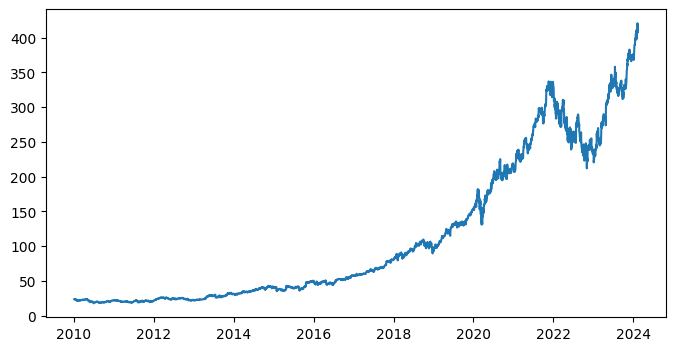

In [ ]:
# # Plotting
plt.figure(figsize=(8,4))
plt.plot(data['Close'], label='Closing Price')

In [5]:
#additional Technical Indicators:
data['rsi'] = 100 - (100 / (1 + data['Close'].pct_change().rolling(window=14).apply(lambda x: x[x > 0].mean(), raw=True) / -data['Close'].pct_change().rolling(window=14).apply(lambda x: x[x < 0].mean(), raw=True)))
data['macd'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['atr'] = data['High'] - data['Low']
k_period = 14
data['stochastic_k'] = 100 * ((data['Close'] - data['Low'].rolling(window=k_period).min()) / (data['High'].rolling(window=k_period).max() - data['Low'].rolling(window=k_period).min()))
data.head(2)

#"rsi", "macd", "atr", "stochastic_k"

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,atr,stochastic_k
Date,,,,,,,,,,,
2010-01-04 05:00:00+00:00,23.224624,23.588694,23.201869,23.474922,3.84091,0.0,0.0,NaN,0.000000,0.386824,NaN
2010-01-05 05:00:00+00:00,23.399067,23.588686,23.239785,23.482498,4.97496,0.0,0.0,NaN,0.000604,0.348901,NaN


In [6]:
# Feature: Moving Averages

data['sma_20'] = data['Close'].rolling(window=20).mean() # 20-day Simple Moving Average
data['ema_12'] = data['Close'].ewm(span=12, adjust=False).mean() # 12-day Exponential Moving Average

# Feature: Rate of Change
data['roc'] = data['Close'].pct_change() * 100 # Percentage change in closing price

# Feature: Bollinger Bands
data['upper_band'], data['lower_band'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std(), data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()

# Feature: Historical Volatility
data['historical_volatility'] = data['Close'].pct_change().rolling(window=20).std() * (252 ** 0.5) # Annualized volatility

# Feature: Price Rate of Change
data['price_roc'] = data['Close'].pct_change()

# Feature Interaction: Volume-Price Interaction
data['volume_price_interaction'] = data['Volume'] * data['Close']

# Feature: Seasonality
data['month'] = data.index.month
data['quarter'] = data.index.quarter

# External Factor: Market Index Movement (Assuming 'market_index' is a separate dataset)
# data['market_index_movement'] = market_index['Close'].pct_change()

# Display the updated DataFrame
data = data.dropna()
data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,atr,...,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02 05:00:00+00:00,21.518044,21.616645,21.343593,21.586306,5.44137,0.0,0.0,30.109412,-0.449416,0.273053,...,22.705443,22.216245,0.175958,24.110902,21.299983,0.236033,0.001760,117.459076,2,1
2010-02-03 05:00:00+00:00,21.434608,21.836602,21.328421,21.715244,6.13979,0.0,0.0,29.112077,-0.456092,0.508181,...,22.617080,22.139168,0.597317,24.038960,21.195200,0.238272,0.005973,133.327040,2,1
2010-02-04 05:00:00+00:00,21.525627,21.616645,21.093294,21.116049,7.78500,0.0,0.0,24.005772,-0.503924,0.523351,...,22.505963,21.981765,-2.759331,24.033889,20.978037,0.252797,-0.027593,164.388440,2,1
2010-02-05 05:00:00+00:00,21.237399,21.449774,20.911253,21.252569,8.09601,0.0,0.0,21.547834,-0.524766,0.538521,...,22.413808,21.869581,0.646524,24.012657,20.814958,0.254982,0.006465,172.061013,2,1
2010-02-08 05:00:00+00:00,21.244994,21.298087,20.911262,21.025034,5.28206,0.0,0.0,22.651439,-0.553265,0.386824,...,22.302311,21.739651,-1.070625,23.963956,20.640667,0.252627,-0.010706,111.055491,2,1


In [7]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()
data['Close Tomorrow'] = (data['Close'].shift(-1) > data['Close']).astype(int)* 2 - 1  # * 2 - 1 ==>   replaces 0 with -1

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,atr,...,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction,month,quarter,Open - Close,High - Low,Close Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02 05:00:00+00:00,21.518044,21.616645,21.343593,21.586306,5.44137,0.0,0.0,30.109412,-0.449416,0.273053,...,24.110902,21.299983,0.236033,0.001760,117.459076,2,1,-0.068262,0.273053,1
2010-02-03 05:00:00+00:00,21.434608,21.836602,21.328421,21.715244,6.13979,0.0,0.0,29.112077,-0.456092,0.508181,...,24.038960,21.195200,0.238272,0.005973,133.327040,2,1,-0.280636,0.508181,-1
2010-02-04 05:00:00+00:00,21.525627,21.616645,21.093294,21.116049,7.78500,0.0,0.0,24.005772,-0.503924,0.523351,...,24.033889,20.978037,0.252797,-0.027593,164.388440,2,1,0.409578,0.523351,1
2010-02-05 05:00:00+00:00,21.237399,21.449774,20.911253,21.252569,8.09601,0.0,0.0,21.547834,-0.524766,0.538521,...,24.012657,20.814958,0.254982,0.006465,172.061013,2,1,-0.015170,0.538521,-1
2010-02-08 05:00:00+00:00,21.244994,21.298087,20.911262,21.025034,5.28206,0.0,0.0,22.651439,-0.553265,0.386824,...,23.963956,20.640667,0.252627,-0.010706,111.055491,2,1,0.219960,0.386824,1


In [8]:
horizons = [2,5,60,250] #2days , week, ...

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["Close Tomorrow"]

    # Calculate sum of positive and negative values separately
    positive_sum_column = f"trend_Positive_{horizon}"
    negative_sum_column = f"trend_Negative_{horizon}"

    data[positive_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == 1]).sum(), raw=True)["Close Tomorrow"]
    data[negative_sum_column] = data.shift(1).rolling(horizon).apply(lambda x: (x[x == -1]).sum(), raw=True)["Close Tomorrow"]


# data = data.dropna(subset=data.columns[data.columns != "Tomorrow"])
data = data.dropna()


data.head(6)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,atr,...,trend_Positive_5,trend_Negative_5,Close_Ratio_60,Trend_60,trend_Positive_60,trend_Negative_60,Close_Ratio_250,Trend_250,trend_Positive_250,trend_Negative_250
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-28 05:00:00+00:00,22.376571,22.399800,21.253872,21.486155,14.12494,0.0,0.0,40.626203,0.165107,1.145928,...,4.0,-1.0,1.015839,-2.0,29.0,-31.0,1.040871,8.0,129.0,-121.0
2011-01-31 05:00:00+00:00,21.501644,21.602300,21.230647,21.470673,6.50290,0.0,0.0,44.251434,0.114505,0.371652,...,3.0,-2.0,1.014572,-2.0,29.0,-31.0,1.040171,6.0,128.0,-122.0
2011-02-01 05:00:00+00:00,21.524871,21.726183,21.377760,21.671984,6.28107,0.0,0.0,41.883518,0.089614,0.348423,...,3.0,-2.0,1.023450,-2.0,29.0,-31.0,1.049810,8.0,129.0,-121.0
2011-02-02 05:00:00+00:00,21.625524,21.764893,21.586809,21.633266,4.58240,0.0,0.0,42.314920,0.066003,0.178085,...,2.0,-3.0,1.020842,-2.0,29.0,-31.0,1.047857,6.0,128.0,-122.0
2011-02-03 05:00:00+00:00,21.656490,21.656490,21.323553,21.408722,6.03401,0.0,0.0,43.039519,0.028839,0.332937,...,1.0,-4.0,1.009629,-2.0,29.0,-31.0,1.036904,6.0,128.0,-122.0
2011-02-04 05:00:00+00:00,21.447437,21.555836,21.300325,21.501637,4.04122,0.0,0.0,43.230491,0.006805,0.255511,...,2.0,-3.0,1.013404,-2.0,29.0,-31.0,1.041352,6.0,128.0,-122.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2011-01-28 05:00:00+00:00 to 2024-02-13 05:00:00+00:00
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Open                      3282 non-null   float64
 1   High                      3282 non-null   float64
 2   Low                       3282 non-null   float64
 3   Close                     3282 non-null   float64
 4   Volume                    3282 non-null   float64
 5   Dividends                 3282 non-null   float64
 6   Stock Splits              3282 non-null   float64
 7   rsi                       3282 non-null   float64
 8   macd                      3282 non-null   float64
 9   atr                       3282 non-null   float64
 10  stochastic_k              3282 non-null   float64
 11  sma_20                    3282 non-null   float64
 12  ema_12                    3282 non-null   float64
 13  roc            

In [47]:
#"rsi", "macd", "atr", "stochastic_k"
X = data[["rsi","macd","atr","stochastic_k",'Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60','trend_Positive_2','trend_Positive_5', 'trend_Positive_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]
X2 = data[['Close',"rsi","macd","atr","stochastic_k", 'Volume', 'Open - Close', 'High - Low', 'Close_Ratio_2', 'Close_Ratio_5', 'Close_Ratio_60', "Close_Ratio_250", 'Trend_2', 'Trend_5', 'Trend_60','trend_Positive_2','trend_Positive_5', 'trend_Positive_60', "sma_20", "ema_12", "roc", "upper_band", "lower_band", "historical_volatility", "price_roc", "volume_price_interaction"]]

#Mohammed says that Ratio_60 is very important
y = data['Close Tomorrow']

# from sklearn.model_selection import train_test_split
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #without random_state=44
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

X_train = X.iloc[0:-250]
y_train = y.iloc[0:-250]

X_test = X.iloc[-250:]
y_test = y.iloc[-250:]

X2_test = X2.iloc[-250:]

X_train.tail()

,rsi,macd,atr,stochastic_k,Volume,Open - Close,High - Low,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,...,trend_Positive_5,trend_Positive_60,sma_20,ema_12,roc,upper_band,lower_band,historical_volatility,price_roc,volume_price_interaction
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-08 05:00:00+00:00,71.133637,6.516339,10.457294,78.129092,5.46860,6.413136,10.457294,0.998447,1.014947,1.092898,...,2.0,31.0,244.853407,252.642554,-0.310206,266.119931,223.586884,0.339821,-0.003102,1445.819703
2023-02-09 05:00:00+00:00,69.631636,6.724512,11.081762,71.347570,4.23751,10.090521,11.081762,0.994136,1.003861,1.078887,...,1.0,30.0,246.233668,253.974936,-1.165975,268.028404,224.438932,0.335818,-0.011660,1107.274243
2023-02-10 05:00:00+00:00,73.735059,6.769860,3.399846,70.213658,2.58185,-1.556208,3.399846,0.999013,0.998270,1.075129,...,1.0,30.0,247.452361,255.023038,-0.197258,269.657062,225.247659,0.336163,-0.001973,673.314459
2023-02-13 05:00:00+00:00,72.135797,7.378204,7.384534,88.137800,4.46309,-3.647649,7.384534,1.015381,1.018216,1.106456,...,2.0,30.0,249.042758,257.163396,3.124292,272.646100,225.439417,0.348516,0.031243,1200.282733
2023-02-14 05:00:00+00:00,68.189258,7.837958,5.639993,86.795236,3.70479,0.495606,5.639993,1.001564,1.017884,1.107631,...,2.0,30.0,250.619775,259.104093,0.313295,275.370170,225.869380,0.348669,0.003133,999.470554


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV #for selecting best parameter (K) for the model
from sklearn.metrics import accuracy_score, confusion_matrix

#using GridSearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
#cv=5 means that the model evaluation is done using 5-fold cross-validation during the grid search for finding the best parameter (n_neighbors) for the KNeighborsClassifier.

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.64%
Test_data Accuracy: 0.52%

Confusion Matrix for Training Data:
[[ 842  610]
 [ 492 1088]]

Confusion Matrix for Test Data:
[[52 60]
 [60 78]]

Correct predictions for class "1" in Training Data: 1088
Correct predictions for class "-1" in Training Data: 842

Correct predictions for class "1" in Test Data: 78
Correct predictions for class "-1" in Test Data: 52


In [39]:
from sklearn.svm import SVC
model2 = SVC()
model2 = model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model2.predict(X_train))
accuracy_test = accuracy_score(y_test, model2.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model2.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model2.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.61%
Test_data Accuracy: 0.54%

Confusion Matrix for Training Data:
[[ 788  664]
 [ 509 1071]]

Confusion Matrix for Test Data:
[[47 65]
 [50 88]]

Correct predictions for class "1" in Training Data: 1071
Correct predictions for class "-1" in Training Data: 788

Correct predictions for class "1" in Test Data: 88
Correct predictions for class "-1" in Test Data: 47


In [48]:
#try to take off some features like Volume to increase the accurecy

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=240, min_samples_split=138, random_state=1)

#fit the model
model3.fit(X_train, y_train)

#Accuracy Score
accuracy_train = accuracy_score(y_train, model3.predict(X_train))
accuracy_test = accuracy_score(y_test, model3.predict(X_test))

print(f'Train_data Accuracy: {accuracy_train:.2f}%')
print(f'Test_data Accuracy: {accuracy_test:.2f}%')

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, model3.predict(X_train))
conf_matrix_test = confusion_matrix(y_test, model3.predict(X_test))

print("\nConfusion Matrix for Training Data:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Data:")
print(conf_matrix_test)

# Number of correct predictions for each class
correct_predictions_1_train = conf_matrix_train[1, 1]
correct_predictions_minus1_train = conf_matrix_train[0, 0]

correct_predictions_1_test = conf_matrix_test[1, 1]
correct_predictions_minus1_test = conf_matrix_test[0, 0]

print(f'\nCorrect predictions for class "1" in Training Data: {correct_predictions_1_train}')
print(f'Correct predictions for class "-1" in Training Data: {correct_predictions_minus1_train}')

print(f'\nCorrect predictions for class "1" in Test Data: {correct_predictions_1_test}')
print(f'Correct predictions for class "-1" in Test Data: {correct_predictions_minus1_test}')

Train_data Accuracy: 0.76%
Test_data Accuracy: 0.54%

Confusion Matrix for Training Data:
[[ 988  464]
 [ 256 1324]]

Confusion Matrix for Test Data:
[[ 98  14]
 [101  37]]

Correct predictions for class "1" in Training Data: 1324
Correct predictions for class "-1" in Training Data: 988

Correct predictions for class "1" in Test Data: 37
Correct predictions for class "-1" in Test Data: 98


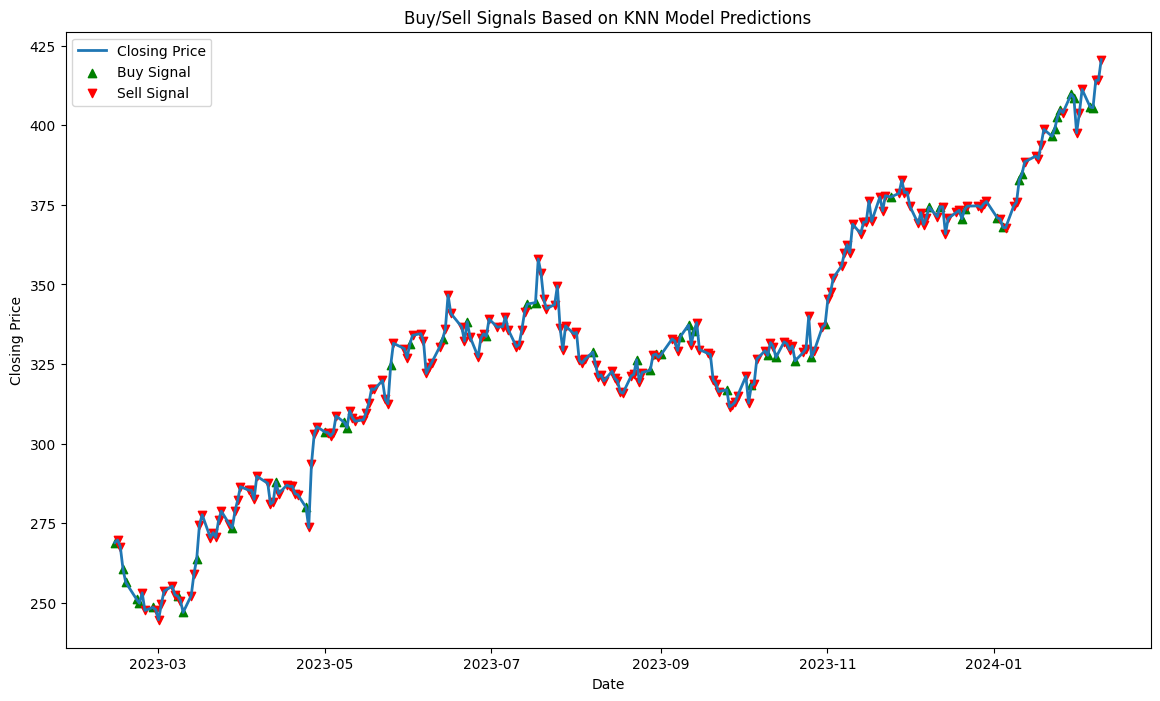

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Create a DataFrame for visualization
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Filter rows where the model predicts a buy signal
buy_signals = df_results[df_results['Predicted'] == 1]

# Filter rows where the model predicts a sell signal
sell_signals = df_results[df_results['Predicted'] == -1]

# Plotting the closing prices
plt.figure(figsize=(14, 8))
plt.plot(data.index[-250:], data['Close'][-250:], label='Closing Price', linewidth=2)

# Plotting buy signals
plt.scatter(buy_signals.index, data['Close'].loc[buy_signals.index], marker='^', color='g', label='Buy Signal')

# Plotting sell signals
plt.scatter(sell_signals.index, data['Close'].loc[sell_signals.index], marker='v', color='r', label='Sell Signal')

plt.title('Buy/Sell Signals Based on KNN Model Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


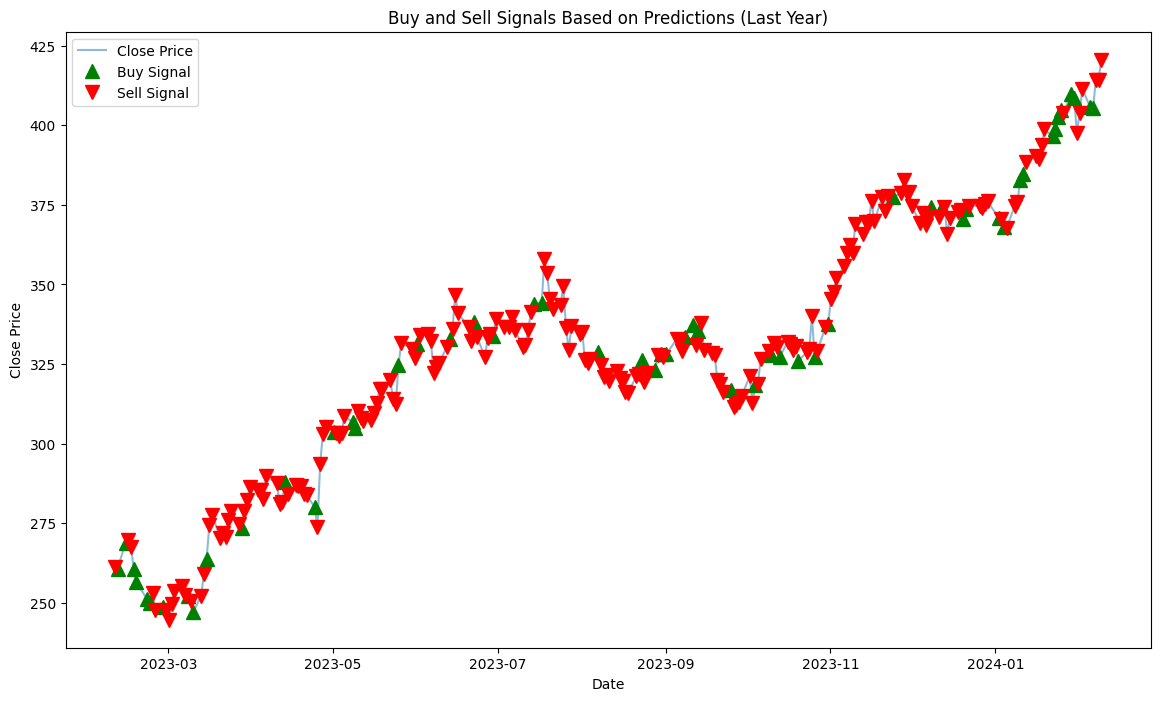

In [ ]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last year
last_year_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(years=1)]

# Filter stock data for the last year
last_year_data = data[data.index >= data.index[-1] - pd.DateOffset(years=1)]

# Plot the Buy (1) and Sell (-1) signals for the last year
plt.figure(figsize=(14, 8))
plt.plot(last_year_data.index, last_year_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == 1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_year_signals[last_year_signals['Buy_Sell_Signal'] == -1].index,
         last_year_data['Close'][last_year_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals Based on Predictions (Last Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


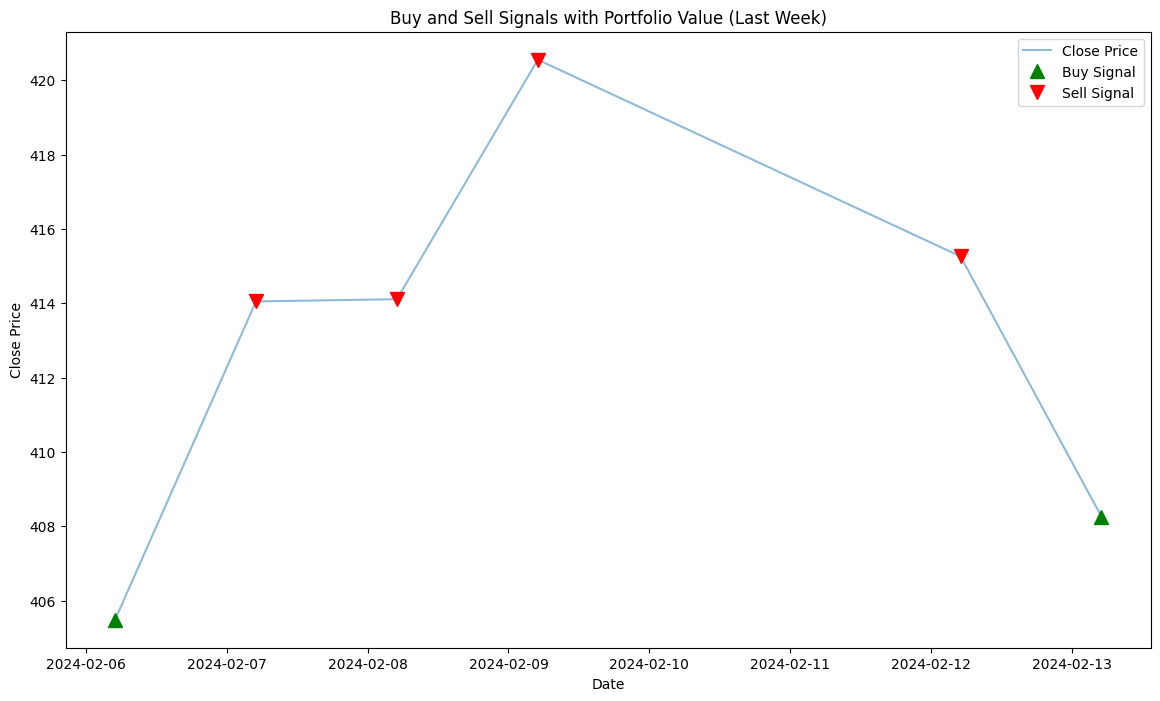

Initial Investment: $405.49
Total Profit after one week of trading: $8.56
Total Portfolio Value: $414.05


In [ ]:
# Assuming 'model' is your trained KNN model
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Concatenate the training and testing predictions for the entire dataset
all_predictions = np.concatenate([predictions_train, predictions_test])

# Create a new DataFrame with the predicted signals
signals_df = pd.DataFrame(index=data.index)
signals_df['Buy_Sell_Signal'] = all_predictions

# Filter signals for the last week
last_week_signals = signals_df[signals_df.index >= signals_df.index[-1] - pd.DateOffset(weeks=1)]

# Filter stock data for the last week
last_week_data = data[data.index >= data.index[-1] - pd.DateOffset(weeks=1)]

# Calculate profit and portfolio value based on buy and sell signals
profit = 0
portfolio_value = 0
position = 0  # 0: no position, 1: long position, -1: short position
buy_price = 0

for index, row in last_week_signals.iterrows():
    if row['Buy_Sell_Signal'] == 1 and position == 0:  # Buy signal and no current position
        buy_price = last_week_data.loc[index, 'Close']
        position = 1  # Set to long position
    elif row['Buy_Sell_Signal'] == -1 and position == 1:  # Sell signal and long position
        profit += last_week_data.loc[index, 'Close'] - buy_price
        position = 0  # Set to no position

# Calculate the initial investment (assuming one stock bought on the first buy signal)
initial_investment = last_week_data.iloc[0]['Close']

# Calculate the total portfolio value
portfolio_value = initial_investment + profit

# Plot the Buy (1) and Sell (-1) signals for the last week
plt.figure(figsize=(14, 8))
plt.plot(last_week_data.index, last_week_data['Close'], label='Close Price', alpha=0.5)

# Plot Buy signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == 1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals
plt.plot(last_week_signals[last_week_signals['Buy_Sell_Signal'] == -1].index,
         last_week_data['Close'][last_week_signals['Buy_Sell_Signal'] == -1],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Portfolio Value (Last Week)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Print the total profit and portfolio value
print(f'Initial Investment: ${initial_investment:.2f}')
print(f'Total Profit after one week of trading: ${profit:.2f}')
print(f'Total Portfolio Value: ${portfolio_value:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 139472.3905029297
Gain or Loss: 39472.39050292969


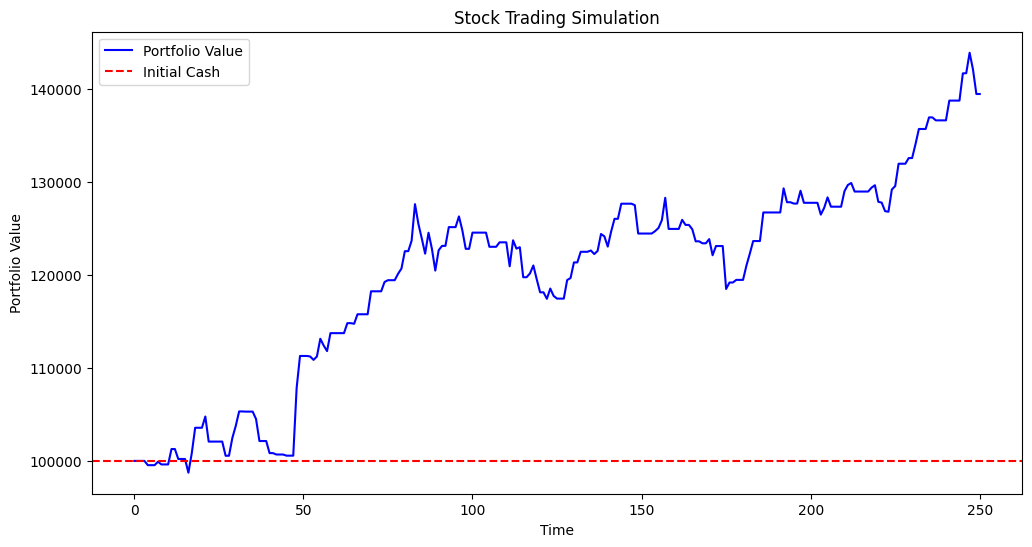

In [43]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

Initial Portfolio Value: 100000
Final Portfolio Value: 157466.63246154794
Gain or Loss: 57466.63246154794


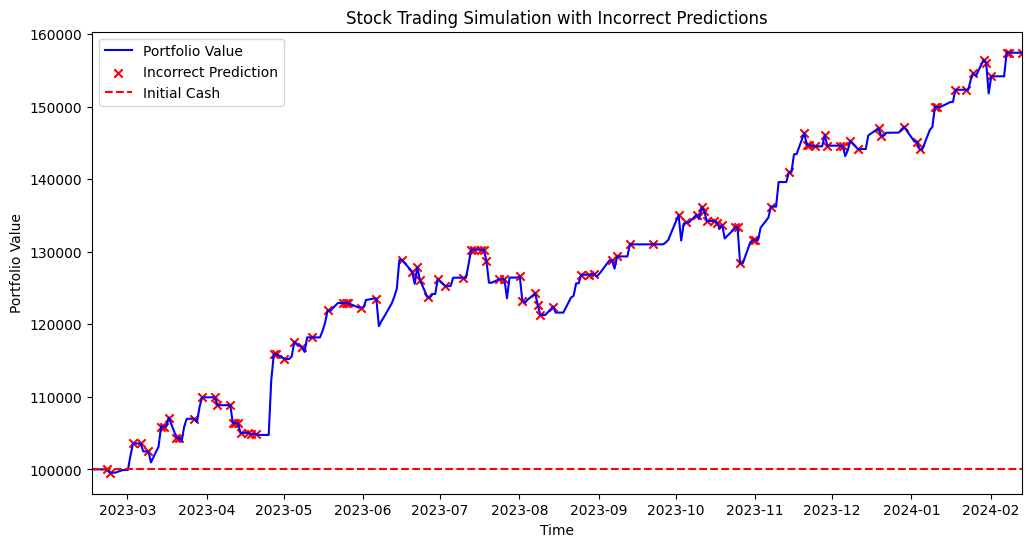

In [ ]:
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []
incorrect_predictions = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

    # Check if the prediction was incorrect
    actual_movement = int(y_test.loc[index])
    if prediction != actual_movement:
        incorrect_predictions.append((index, portfolio_value[-1]))

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X2_test.index, portfolio_value[:-1], label='Portfolio Value', color='blue')  # Exclude the last value for better visualization
incorrect_indices, incorrect_values = zip(*incorrect_predictions)
plt.scatter(incorrect_indices, incorrect_values, color='red', marker='x', label='Incorrect Prediction')

plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation with Incorrect Predictions')
plt.legend()
plt.xlim(X2_test.index[0], X2_test.index[-1])  # Set the x-axis limits to the desired date range
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

Initial Portfolio Value: 100000
Final Portfolio Value: 130664.60380554199
Gain or Loss: 30664.603805541992


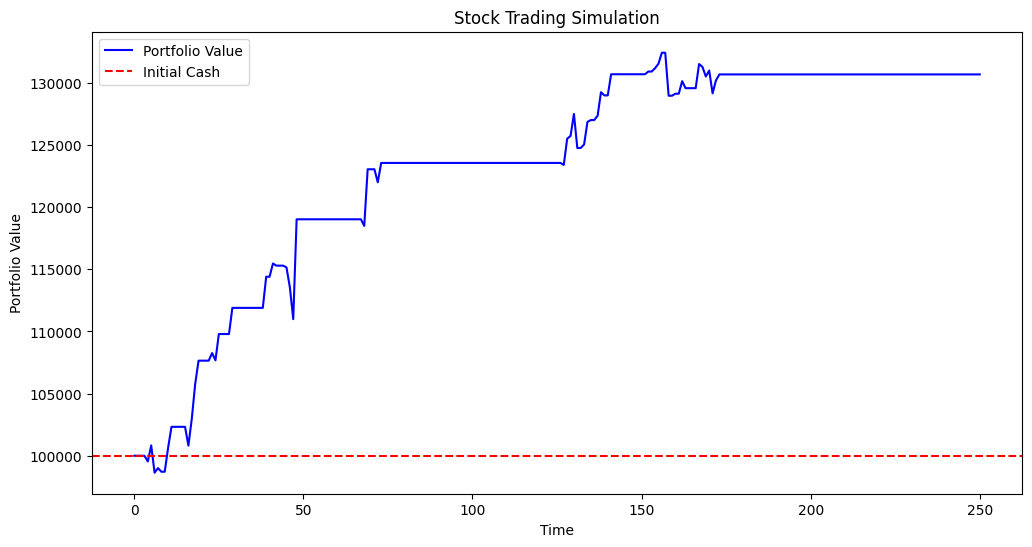

In [40]:
#random forest model without "Volume" feature
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

Initial Portfolio Value: 100000
Final Portfolio Value: 133582.4071044922
Gain or Loss: 33582.40710449219


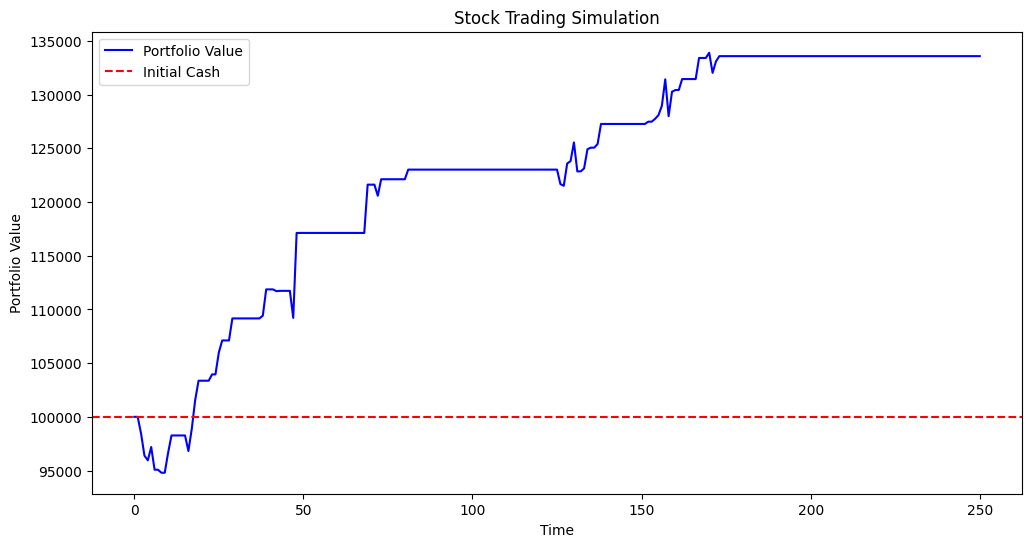

In [36]:
#random forest model with "Volume" feature
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

Initial Portfolio Value: 100000
Final Portfolio Value: 499441.12229919434
Gain or Loss: 399441.12229919434


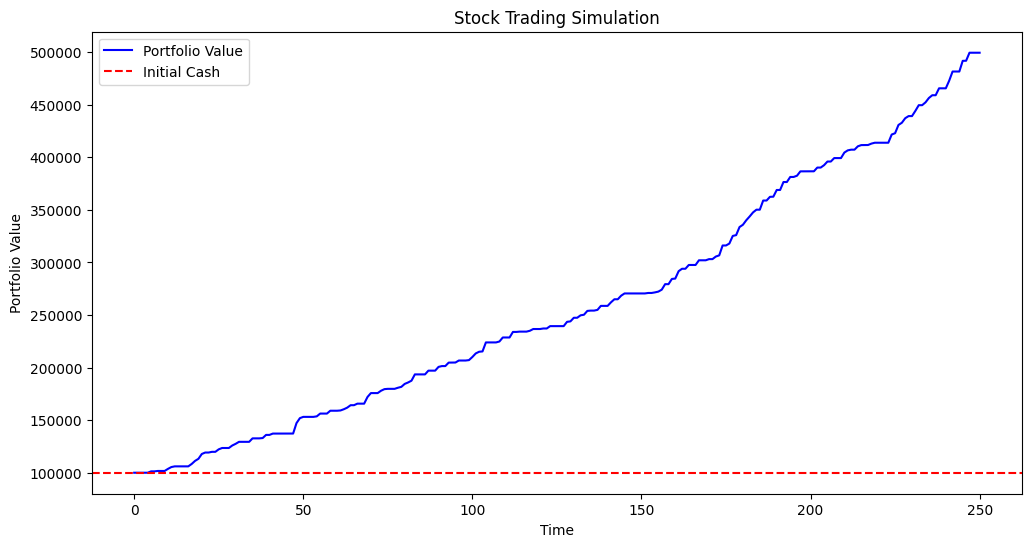

In [46]:
#perfect model
#random forest model with "Volume" feature
import matplotlib.pyplot as plt

initial_cash = 100000  # Set your initial cash amount
cash = initial_cash
stocks_held = 0   # Number of stocks
portfolio_value = []

for index, row in X2_test.iterrows():
    newRow = row.drop('Close').copy()
    prediction = model3.predict([newRow])[0]

    if prediction == 1:  # Buy signal
        while cash > row['Close']:
            stocks_held += 1
            cash -= row['Close']
    elif prediction == -1:  # Sell signal
        while stocks_held > 0:
            cash += row['Close']
            stocks_held -= 1

    portfolio_value.append(cash + stocks_held * row['Close'])

# Include the last portfolio value after the last data point
portfolio_value.append(cash + stocks_held * X2_test.iloc[-1]['Close'])

final_portfolio_value = portfolio_value[-1]  # Use the last value in the list
gain_or_loss = final_portfolio_value - initial_cash

print(f"Initial Portfolio Value: {initial_cash}")
print(f"Final Portfolio Value: {final_portfolio_value}")
print(f"Gain or Loss: {gain_or_loss}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='blue')
plt.axhline(y=initial_cash, color='r', linestyle='--', label='Initial Cash')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Stock Trading Simulation')
plt.legend()
plt.show()
